In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Preprocess the Data Load the feature data
data = pd.read_csv('MyData.txt', delimiter='\s+', header=0)
labels_df = pd.read_csv('MyClass.txt', sep=' ', header=0)
labels = labels_df.iloc[:, -1]  # Extract the last column as labels
y = labels
X = data

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\732422738.py:18: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('MyData.txt', delimiter='\s+', header=0)


In [3]:
#Step 2: Handle Class Imbalance, Check class distribution
pd.Series(labels).value_counts()

x
2    457
1    326
5    222
4    209
6    187
3    185
7     39
Name: count, dtype: int64

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\1045739099.py:18: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('MyData.txt', delimiter='\s+', header=0)


Comparison without SMOTE:
            Classifier  Accuracy   ROC AUC  Sensitivity  Specificity
0        Decision Tree  0.737231  0.796694     0.975977     0.924070
1  K-Nearest Neighbors  0.627692  0.809326     0.920502     0.861275
2  Logistic Regression  0.779077  0.930380     0.972722     0.932168
3       MLP Classifier  0.739692  0.910580     0.963585     0.912117
4        Random Forest  0.793846  0.924861     0.979436     0.946034
5     SVM (RBF Kernel)  0.769846  0.928744     0.965172     0.934301

Comparison with SMOTE:
            Classifier  Accuracy   ROC AUC  Sensitivity  Specificity
0        Decision Tree  0.829006  0.900247     0.920860     0.953528
1  K-Nearest Neighbors  0.818380  0.958917     0.875122     0.949941
2  Logistic Regression  0.768062  0.952523     0.979695     0.937986
3       MLP Classifier  0.888402  0.981884     0.940193     0.969554
4        Random Forest  0.897469  0.987909     0.978796     0.960885
5     SVM (RBF Kernel)  0.886844  0.982489     0.9636

C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\1045739099.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Classifier', data=summary_no_smote, palette='viridis', label='No SMOTE')
C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\1045739099.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Classifier', data=summary_smote, palette='magma', alpha=0.7, label='SMOTE')


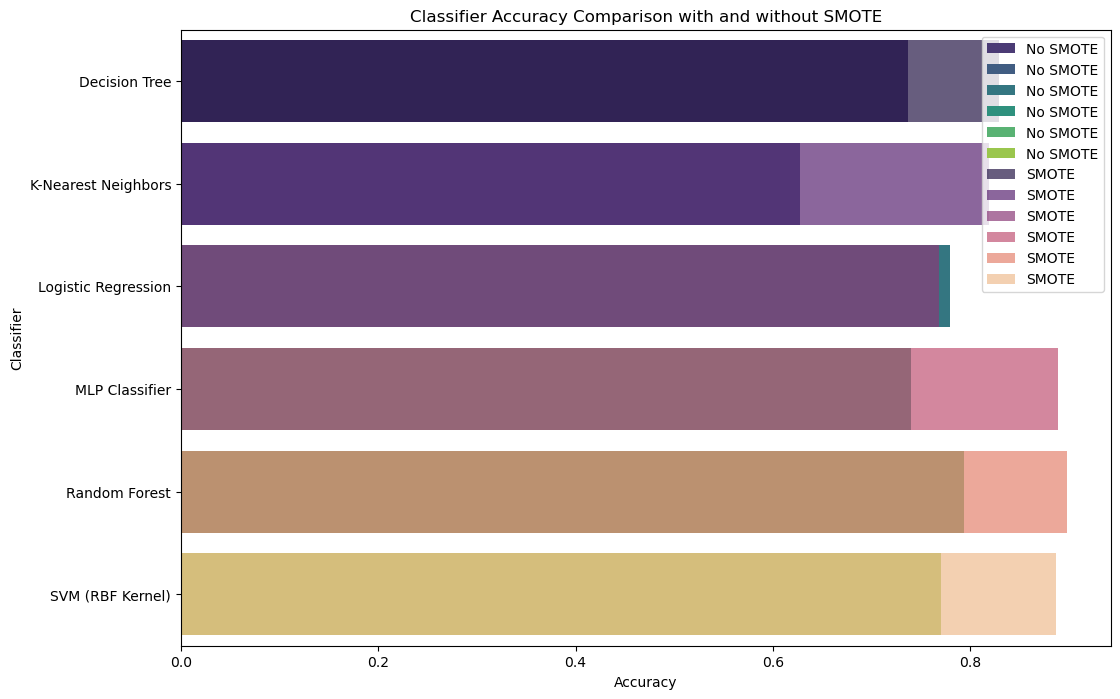

C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\1045739099.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC AUC', y='Classifier', data=summary_no_smote, palette='coolwarm', label='No SMOTE')
C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\1045739099.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC AUC', y='Classifier', data=summary_smote, palette='Blues', alpha=0.7, label='SMOTE')


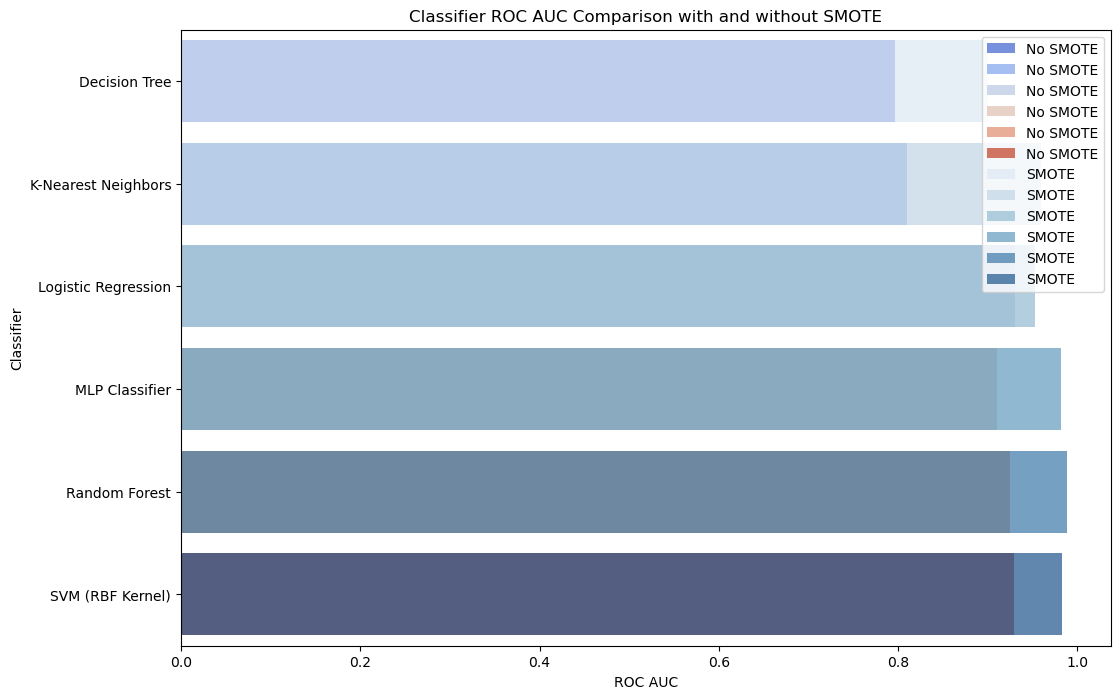

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('MyData.txt', delimiter='\s+', header=0)
labels_df = pd.read_csv('MyClass.txt', sep=' ', header=0)
labels = labels_df.iloc[:, -1]  # Extract the last column as labels

# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "MLP Classifier": MLPClassifier(max_iter=1000)
}

# Lists to store performance metrics
results_smote = []
results_no_smote = []

# Stratified K-Fold Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate classifiers 
def evaluate_classifiers(X_train, X_test, y_train, y_test):
    fold_results = []

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)

        # Calculate performance metrics
        acc = accuracy_score(y_test, y_pred)
        if len(np.unique(labels)) > 2:
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        else:
            roc_auc = roc_auc_score(y_test, y_prob[:, 1])
        
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if cm.shape[0] > 1 and cm[1, 1] + cm[1, 0] > 0 else 0
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if cm.shape[0] > 1 and cm[0, 0] + cm[0, 1] > 0 else 0

        fold_results.append({
            'Classifier': name,
            'Accuracy': acc,
            'ROC AUC': roc_auc,
            'Sensitivity': sensitivity,
            'Specificity': specificity
        })

    return fold_results

# Evaluation without SMOTE (Imbalanced Data)
for train_index, test_index in skf.split(data, labels):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

    # (Optional) Apply PCA for dimensionality reduction
    pca = PCA(n_components=20)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Standardize the data
    scaler = StandardScaler()
    X_train_pca = scaler.fit_transform(X_train_pca)
    X_test_pca = scaler.transform(X_test_pca)

    results_no_smote.extend(evaluate_classifiers(X_train_pca, X_test_pca, y_train, y_test))

# Evaluation with SMOTE (Balanced Data)
smote = SMOTE(random_state=42)
data_resampled, labels_resampled = smote.fit_resample(data, labels)

for train_index, test_index in skf.split(data_resampled, labels_resampled):
    X_train, X_test = data_resampled.iloc[train_index], data_resampled.iloc[test_index]
    y_train, y_test = labels_resampled.iloc[train_index], labels_resampled.iloc[test_index]

    # (Optional) Apply PCA for dimensionality reduction
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Standardize the data
    X_train_pca = scaler.fit_transform(X_train_pca)
    X_test_pca = scaler.transform(X_test_pca)

    results_smote.extend(evaluate_classifiers(X_train_pca, X_test_pca, y_train, y_test))

# Convert results to DataFrames
results_no_smote_df = pd.DataFrame(results_no_smote)
results_smote_df = pd.DataFrame(results_smote)

# Summarize and Compare
summary_no_smote = results_no_smote_df.groupby('Classifier').mean().reset_index()
summary_smote = results_smote_df.groupby('Classifier').mean().reset_index()

print("Comparison without SMOTE:")
print(summary_no_smote)
print("\nComparison with SMOTE:")
print(summary_smote)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Classifier', data=summary_no_smote, palette='viridis', label='No SMOTE')
sns.barplot(x='Accuracy', y='Classifier', data=summary_smote, palette='magma', alpha=0.7, label='SMOTE')
plt.title('Classifier Accuracy Comparison with and without SMOTE')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='ROC AUC', y='Classifier', data=summary_no_smote, palette='coolwarm', label='No SMOTE')
sns.barplot(x='ROC AUC', y='Classifier', data=summary_smote, palette='Blues', alpha=0.7, label='SMOTE')
plt.title('Classifier ROC AUC Comparison with and without SMOTE')
plt.legend()
plt.show()


E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classifier: Logistic Regression
Cross-Validation Accuracy: 0.8739286366959064
Classification Report:
              precision    recall  f1-score     support
0              0.672727  0.569231  0.616667   65.000000
1              0.935065  0.791209  0.857143   91.000000
2              0.391304  0.486486  0.433735   37.000000
3              0.729167  0.833333  0.777778   42.000000
4              0.934783  0.955556  0.945055   45.000000
5              0.820513  0.864865  0.842105   37.000000
6              0.000000  0.000000  0.000000    8.000000
accuracy       0.729231  0.729231  0.729231    0.729231
macro avg      0.640508  0.642954  0.638926  325.000000
weighted avg   0.757987  0.729231  0.739949  325.000000
Confusion Matrix:
[[37  0 21  0  1  0  6]
 [ 1 72  1 11  1  1  4]
 [10  0 18  0  1  5  3]
 [ 0  5  0 35  0  1  1]
 [ 1  0  0  1 43  0  0]
 [ 1  0  4  0  0 32  0]
 [ 5  0  2  1  0  0  0]]


Classifier: SVM (RBF Kernel)
Cross-Validation Accuracy: 0.9301337110136452
Classification Repo

<Figure size 1500x1000 with 0 Axes>

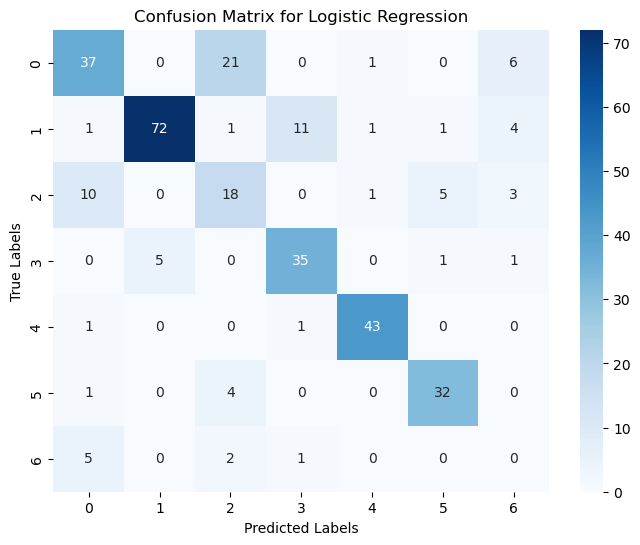

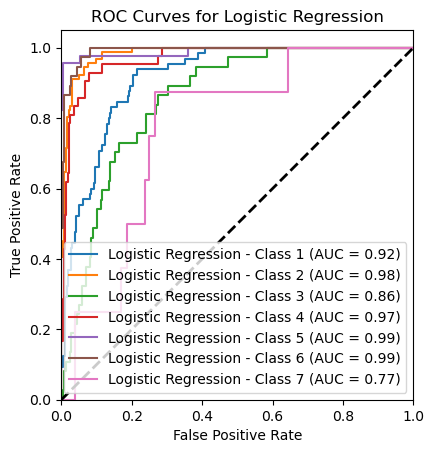

E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


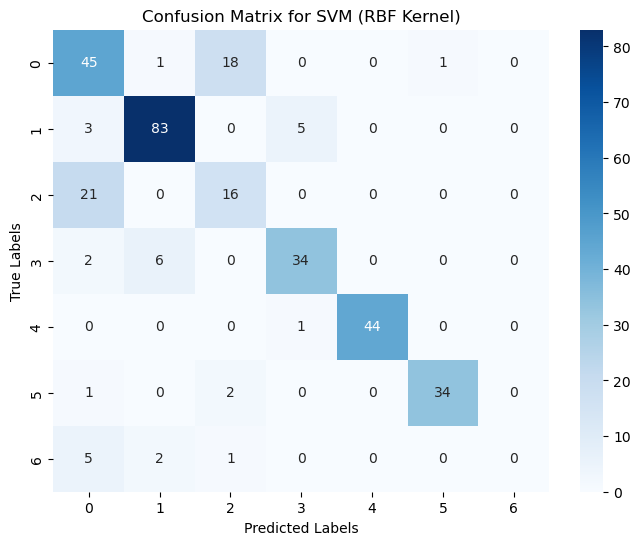

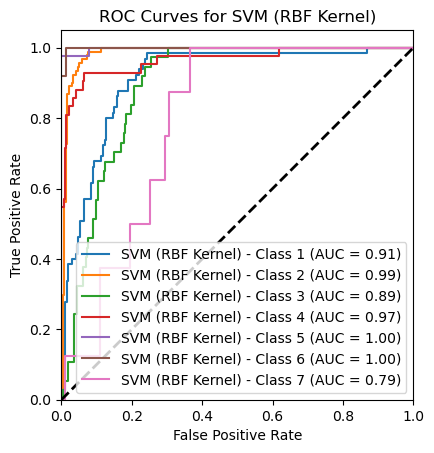

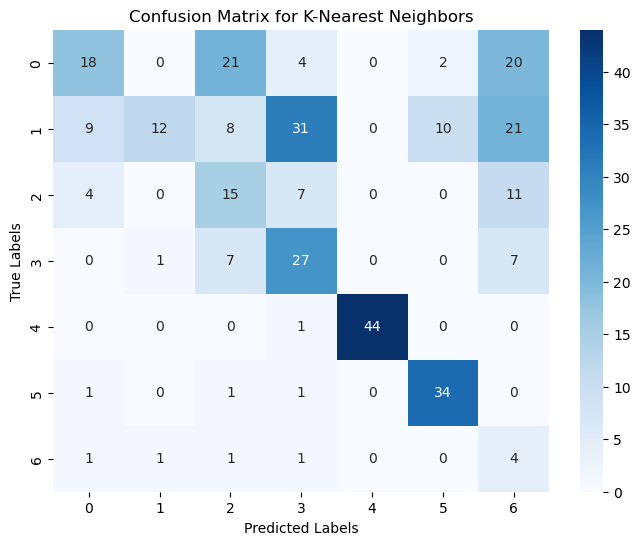

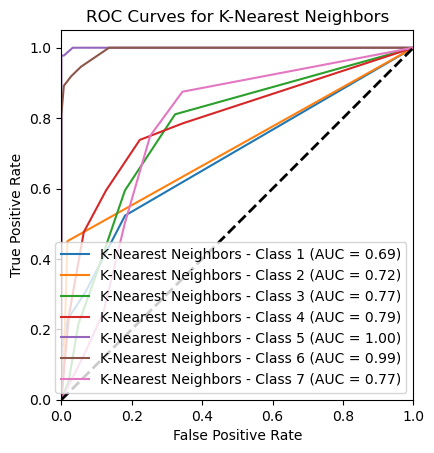

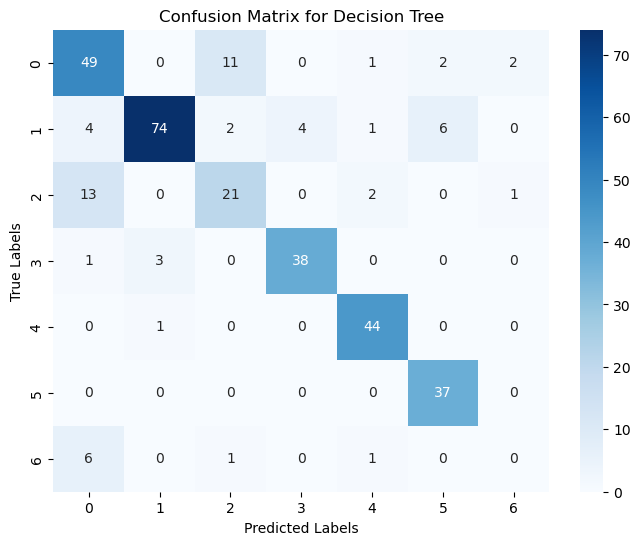

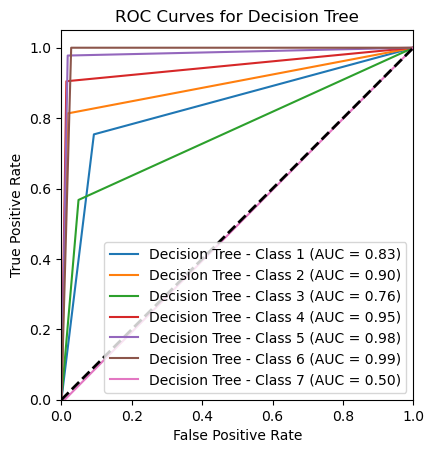

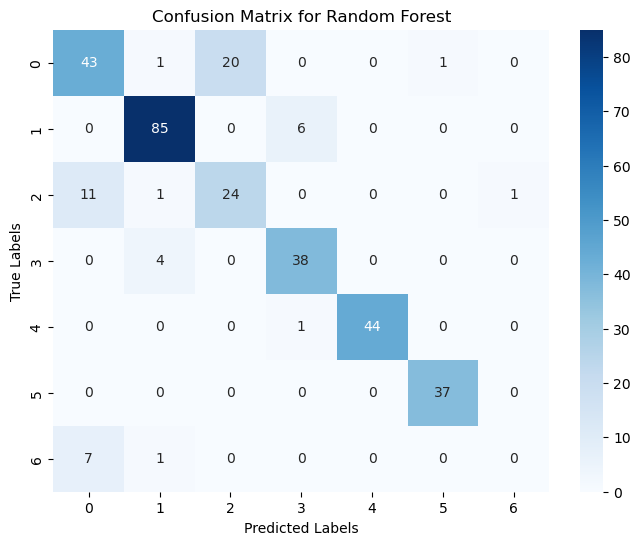

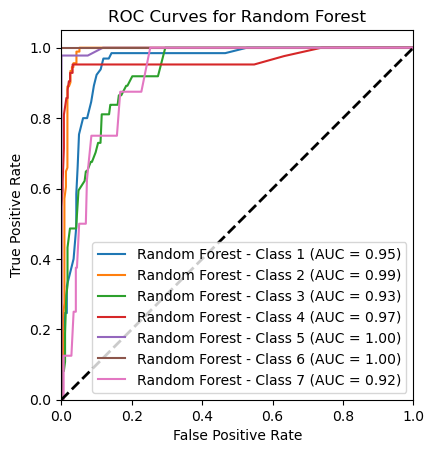

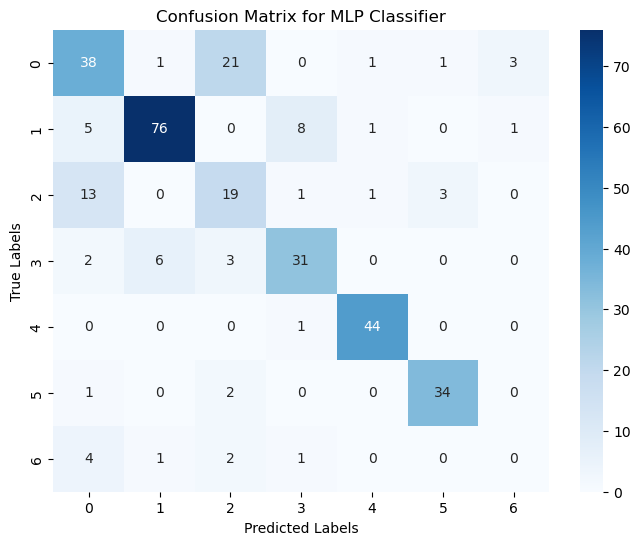

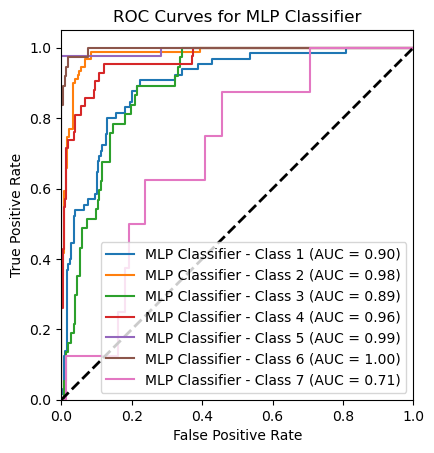

Classifier: Logistic Regression
Cross-Validation Accuracy: 0.8739286366959064
Classification Report:
              precision    recall  f1-score     support
0              0.672727  0.569231  0.616667   65.000000
1              0.935065  0.791209  0.857143   91.000000
2              0.391304  0.486486  0.433735   37.000000
3              0.729167  0.833333  0.777778   42.000000
4              0.934783  0.955556  0.945055   45.000000
5              0.820513  0.864865  0.842105   37.000000
6              0.000000  0.000000  0.000000    8.000000
accuracy       0.729231  0.729231  0.729231    0.729231
macro avg      0.640508  0.642954  0.638926  325.000000
weighted avg   0.757987  0.729231  0.739949  325.000000
Confusion Matrix:
[[37  0 21  0  1  0  6]
 [ 1 72  1 11  1  1  4]
 [10  0 18  0  1  5  3]
 [ 0  5  0 35  0  1  1]
 [ 1  0  0  1 43  0  0]
 [ 1  0  4  0  0 32  0]
 [ 5  0  2  1  0  0  0]]


Classifier: SVM (RBF Kernel)
Cross-Validation Accuracy: 0.9301337110136452
Classification Repo

In [5]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the string labels into integer labels
y_encoded = label_encoder.fit_transform(y)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "MLP Classifier": MLPClassifier(max_iter=1000)
}

# Train and evaluate the classifiers
results = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for clf_name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train_smote, y_train_smote, cv=skf, scoring='accuracy')
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)
    results[clf_name] = {
        "cv_accuracy": cv_scores.mean(),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

# Display the results
for clf_name, result in results.items():
    print(f"Classifier: {clf_name}")
    print(f"Cross-Validation Accuracy: {result['cv_accuracy']}")
    print("Classification Report:")
    print(pd.DataFrame(result["classification_report"]).transpose())
    print("Confusion Matrix:")
    print(result["confusion_matrix"])
    print("\n")

# Initialize the figure for ROC curves
plt.figure(figsize=(15, 10))

# Update the classifiers and the evaluation loop to include visualizations
for i, (clf_name, clf) in enumerate(classifiers.items()):
    cv_scores = cross_val_score(clf, X_train_smote, y_train_smote, cv=skf, scoring='accuracy')
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)
    results[clf_name] = {
        "cv_accuracy": cv_scores.mean(),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[clf_name]["confusion_matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {clf_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    # Plot ROC curves for each class if the classifier supports it
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
        y_test_bin = label_binarize(y_test, classes=np.arange(len(np.unique(y))))
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for j in range(len(np.unique(y))):
            fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_score[:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])
            RocCurveDisplay(fpr=fpr[j], tpr=tpr[j], roc_auc=roc_auc[j], estimator_name=f'{clf_name} - Class {j+1}').plot(ax=plt.gca())

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curves for {clf_name}")
        plt.show()

# Display the results
for clf_name, result in results.items():
    print(f"Classifier: {clf_name}")
    print(f"Cross-Validation Accuracy: {result['cv_accuracy']}")
    print("Classification Report:")
    print(pd.DataFrame(result["classification_report"]).transpose())
    print("Confusion Matrix:")
    print(result["confusion_matrix"])
    print("\n")

**1b**
**Method 1**

In [7]:
# Train Random Forest and Gradient Boosting classifiers
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
#gb = GradientBoostingClassifier(random_state=42)

rf.fit(X_train_smote, y_train_smote)
#gb.fit(X_train_smote, y_train_smote)

# Get feature importances
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
#gb_importances = pd.DataFrame({'Feature': X.columns, 'Importance': gb.feature_importances_}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(rf_importances)
print("\n")
#print("Gradient Boosting Feature Importances:")
#print(gb_importances)

Random Forest Feature Importances:
    Feature  Importance
3        X4    0.123690
1        X2    0.083136
2        X3    0.075792
0        X1    0.073862
4        X5    0.068855
..      ...         ...
102    X103    0.002891
5        X6    0.002772
20      X21    0.002732
91      X92    0.002617
81      X82    0.002510

[105 rows x 2 columns]




**Method 2**

In [9]:
from sklearn.feature_selection import RFE

# Initialize classifiers
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Initialize RFE
rf_rfe = RFE(estimator=rf, n_features_to_select=1)
gb_rfe = RFE(estimator=gb, n_features_to_select=1)

# Fit RFE
rf_rfe.fit(X_train_smote, y_train_smote)
gb_rfe.fit(X_train_smote, y_train_smote)

# Get selected features
rf_selected_features = X.columns[rf_rfe.support_]
gb_selected_features = X.columns[gb_rfe.support_]

print("Random Forest Selected Features:")
print(rf_selected_features)
print("\n")
print("Gradient Boosting Selected Features:")
print(gb_selected_features)

Random Forest Selected Features:
Index(['X4'], dtype='object')


Gradient Boosting Selected Features:
Index(['X2'], dtype='object')


**Method 3**

In [11]:
from sklearn.inspection import permutation_importance

# Fit Random Forest classifier
rf.fit(X_train_smote, y_train_smote)

# Calculate permutation importance for each observation
rf_perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances for misclassified observations
misclassified_indices = y_test != rf.predict(X_test)
rf_misclassified_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_perm_importance.importances_mean}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance for Misclassified Observations:")
print(rf_misclassified_importance)

Random Forest Feature Importance for Misclassified Observations:
   Feature  Importance
3       X4    0.246462
4       X5    0.020308
2       X3    0.006462
79     X80    0.004000
70     X71    0.004000
..     ...         ...
72     X73   -0.009846
90     X91   -0.010769
8       X9   -0.011077
34     X35   -0.012000
64     X65   -0.013231

[105 rows x 2 columns]


**Method 4 LASSO**

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the features for Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso model
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Get predictions and identify misclassified observations
y_pred = lasso.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype(int)  # Assuming binary classification with threshold 0.5
misclassified_indices = y_test != y_pred_class

# Get feature importances (Lasso coefficients) for misclassified observations
lasso_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(lasso.coef_)}).sort_values(by='Importance', ascending=False)

print("Lasso Feature Importance for Misclassified Observations:")
print(lasso_importance)

Lasso Feature Importance for Misclassified Observations:
    Feature  Importance
4        X5    1.015936
3        X4    0.166855
2        X3    0.147955
88      X89    0.022595
83      X84    0.008463
..      ...         ...
34      X35    0.000000
33      X34    0.000000
32      X33    0.000000
31      X32    0.000000
104    X105    0.000000

[105 rows x 2 columns]


E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Method 5 ANOVA**

In [15]:
from sklearn.feature_selection import f_classif
import numpy as np

# Perform ANOVA F-test
f_scores, p_values = f_classif(X_train, y_train)

# Get predictions and identify misclassified observations
misclassified_indices = y_test != rf.predict(X_test)  # Reusing RF predictions for consistency

# Calculate importance based on F-scores for misclassified observations
anova_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': f_scores}).sort_values(by='Importance', ascending=False)

print("ANOVA Feature Importance for Misclassified Observations:")
print(anova_importance)

ANOVA Feature Importance for Misclassified Observations:
   Feature   Importance
3       X4  1773.044187
4       X5   709.606561
2       X3   454.253177
1       X2   427.410957
0       X1   160.108916
..     ...          ...
69     X70     2.356028
10     X11     2.283948
30     X31     2.134708
96     X97     1.238839
94     X95     0.957300

[105 rows x 2 columns]


**Method 6 Wrapper LDA**

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Use Recursive Feature Elimination (RFE) with LDA
rfe = RFE(estimator=lda, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

# Get feature rankings
rfe_ranking = pd.DataFrame({'Feature': X_train.columns, 'Ranking': rfe.ranking_}).sort_values(by='Ranking', ascending=True)

# Get predictions and identify misclassified observations
y_pred = rfe.predict(X_test)
misclassified_indices = y_test != y_pred

# Calculate importance based on RFE ranking for misclassified observations
# (Ranking is inverse importance; lower rank means higher importance)
lda_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': -rfe_ranking['Ranking']}).sort_values(by='Importance', ascending=False)

print("Wrapper LDA Feature Importance for Misclassified Observations:")
print(lda_importance)

Wrapper LDA Feature Importance for Misclassified Observations:
   Feature  Importance
3       X1          -1
2       X2          -2
0       X3          -3
1       X4          -4
4       X5          -5
..     ...         ...
58    X101        -101
38    X102        -102
51    X103        -103
48    X104        -104
28    X105        -105

[105 rows x 2 columns]


E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


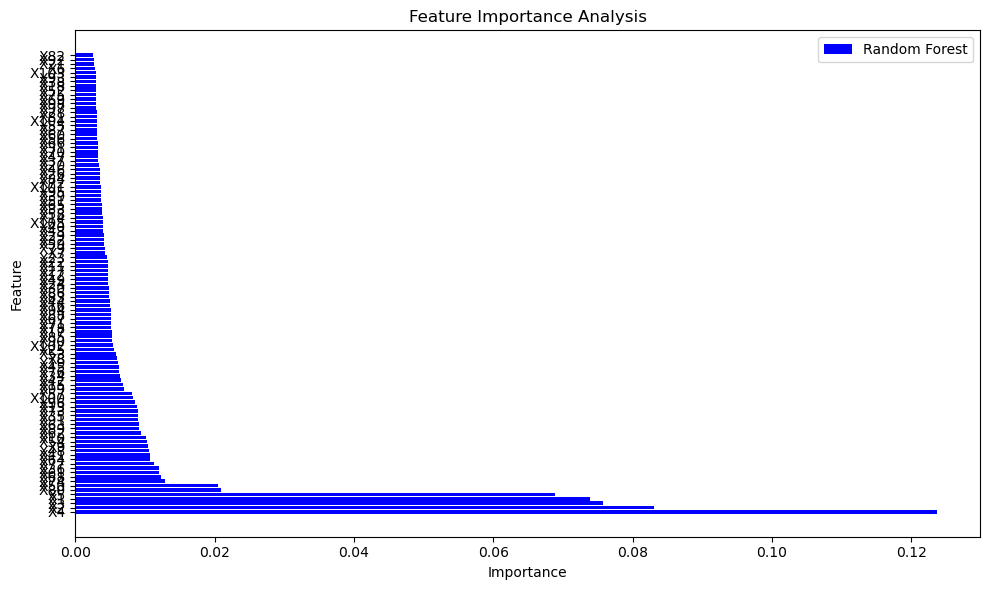

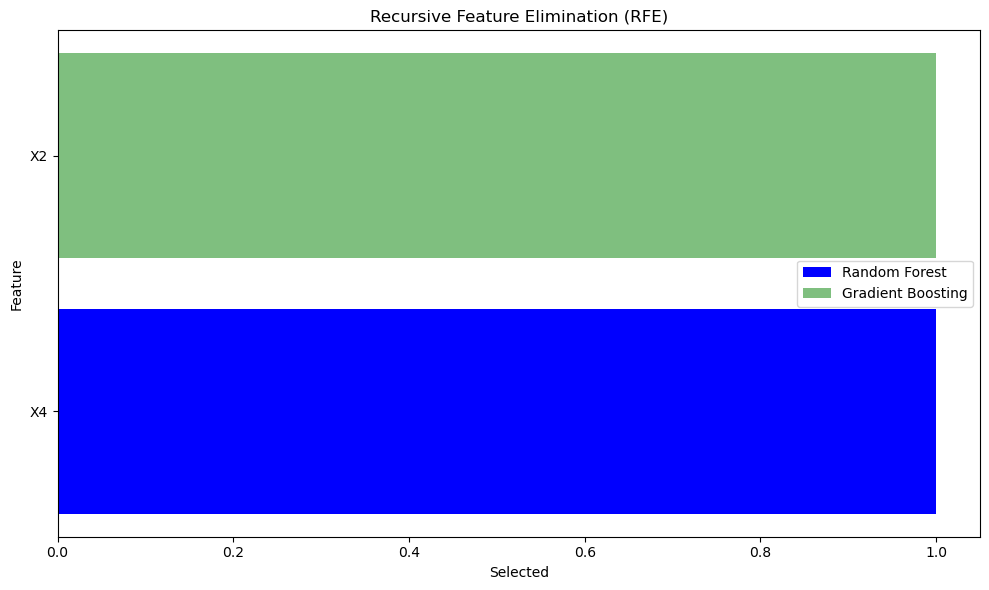

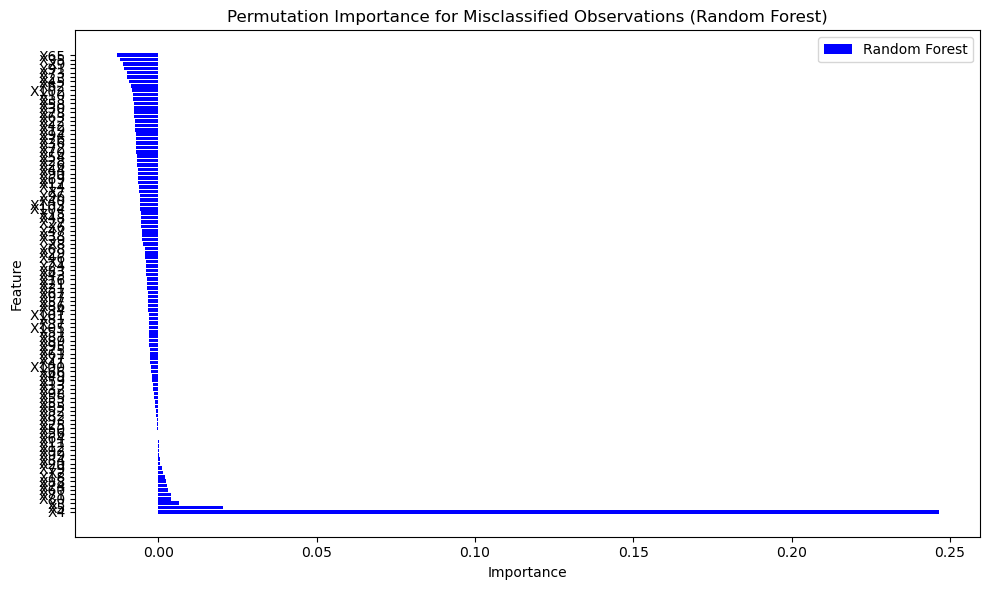

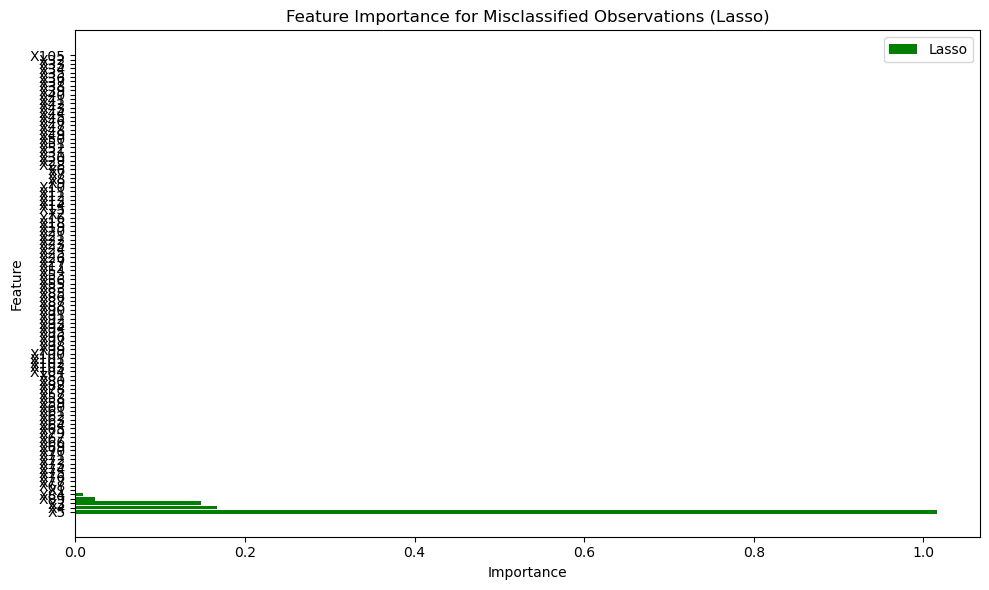

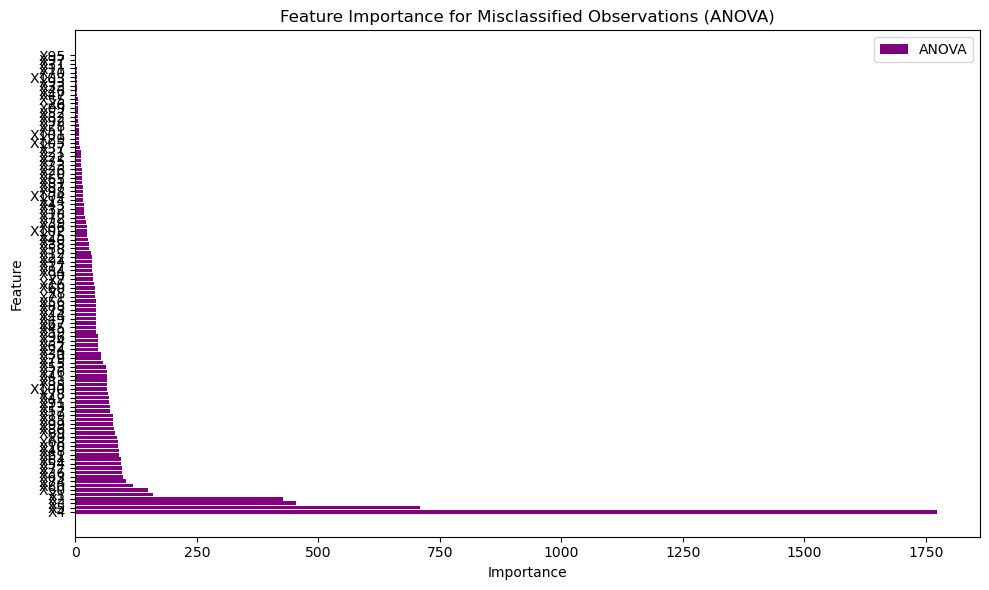

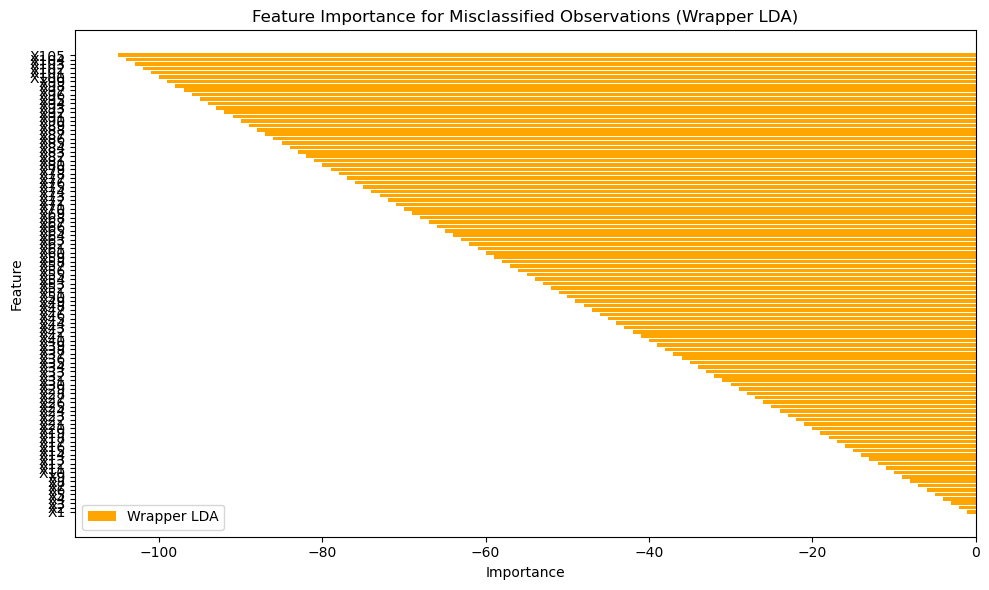

In [18]:
import matplotlib.pyplot as plt

# Method 1: Feature Importance Analysis
plt.figure(figsize=(10, 6))
plt.barh(rf_importances['Feature'], rf_importances['Importance'], color='blue', label='Random Forest')
#plt.barh(gb_importances['Feature'], gb_importances['Importance'], color='green', alpha=0.5, label='Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.legend()
plt.tight_layout()
plt.show()

# Method 2: Recursive Feature Elimination (RFE)
plt.figure(figsize=(10, 6))
plt.barh(rf_selected_features, [1] * len(rf_selected_features), color='blue', label='Random Forest')
plt.barh(gb_selected_features, [1] * len(gb_selected_features), color='green', alpha=0.5, label='Gradient Boosting')
plt.xlabel('Selected')
plt.ylabel('Feature')
plt.title('Recursive Feature Elimination (RFE)')
plt.legend()
plt.tight_layout()
plt.show()

# Method 3: Local Explanations (Permutation Importance)
plt.figure(figsize=(10, 6))
plt.barh(rf_misclassified_importance['Feature'], rf_misclassified_importance['Importance'], color='blue', label='Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance for Misclassified Observations (Random Forest)')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Lasso feature importance for misclassified observations
plt.figure(figsize=(10, 6))
plt.barh(lasso_importance['Feature'], lasso_importance['Importance'], color='green', label='Lasso')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Misclassified Observations (Lasso)')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting ANOVA feature importance for misclassified observations
plt.figure(figsize=(10, 6))
plt.barh(anova_importance['Feature'], anova_importance['Importance'], color='purple', label='ANOVA')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Misclassified Observations (ANOVA)')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Wrapper LDA feature importance for misclassified observations
plt.figure(figsize=(10, 6))
plt.barh(lda_importance['Feature'], lda_importance['Importance'], color='orange', label='Wrapper LDA')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Misclassified Observations (Wrapper LDA)')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.feature_selection import f_classif, RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import recall_score, make_scorer, accuracy_score

# Load the data
data = pd.read_csv('MyData.txt', delimiter='\s+', header=0)
labels_df = pd.read_csv('MyClass.txt', sep=' ', header=0)
labels = labels_df.iloc[:, -1]  # Extract the last column as labels

# Ensure labels are categorical
labels = labels.astype('category')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Scale the features for Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a dictionary to hold results
feature_selection_results = {'Method': [], 'Level': [], 'Class': [], 'Feature': [], 'Importance': [], 'CV Accuracy': [], 'CV Recall': []}

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def calculate_cv_metrics(clf, X, y):
    accuracies = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
    recalls = cross_val_score(clf, X, y, cv=skf, scoring=make_scorer(recall_score, average='macro'))
    return accuracies.mean(), recalls.mean()

# Wrapper-Based (Forward Greedy Search) - Overall Level
lda = LinearDiscriminantAnalysis()
rfe = RFE(estimator=lda, n_features_to_select=3, step=1)
rfe.fit(X_train, y_train)
cv_accuracy, cv_recall = calculate_cv_metrics(rfe, X_train, y_train)
for feature, rank in zip(X_train.columns, rfe.ranking_):
    if rank == 1:
        feature_selection_results['Method'].append('Wrapper')
        feature_selection_results['Level'].append('Overall')
        feature_selection_results['Class'].append('All')
        feature_selection_results['Feature'].append(feature)
        feature_selection_results['Importance'].append(-rank)  # Inverse ranking as importance
        feature_selection_results['CV Accuracy'].append(cv_accuracy)
        feature_selection_results['CV Recall'].append(cv_recall)

# Filter-Based (ANOVA) - Overall Level
f_scores, p_values = f_classif(X_train, y_train)
for feature, p_value in zip(X_train.columns, p_values):
    if p_value < 0.01:
        feature_selection_results['Method'].append('ANOVA')
        feature_selection_results['Level'].append('Overall')
        feature_selection_results['Class'].append('All')
        feature_selection_results['Feature'].append(feature)
        feature_selection_results['Importance'].append(-np.log10(p_value))  # Higher score for lower p-value
        feature_selection_results['CV Accuracy'].append(cv_accuracy)
        feature_selection_results['CV Recall'].append(cv_recall)

# Embedded (Lasso) - Overall Level
lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
cv_accuracy, cv_recall = calculate_cv_metrics(lasso, X_train_scaled, y_train)
for feature, coef in zip(X_train.columns, lasso.coef_):
    if coef != 0:
        feature_selection_results['Method'].append('LASSO')
        feature_selection_results['Level'].append('Overall')
        feature_selection_results['Class'].append('All')
        feature_selection_results['Feature'].append(feature)
        feature_selection_results['Importance'].append(np.abs(coef))
        feature_selection_results['CV Accuracy'].append(cv_accuracy)
        feature_selection_results['CV Recall'].append(cv_recall)

# Class Level Feature Selection
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

for i, class_label in enumerate(lb.classes_):
    y_train_binary = y_train_binarized[:, i]
    
    # Wrapper-Based (Forward Greedy Search) - Class Level
    rfe = RFE(estimator=lda, n_features_to_select=3, step=1)
    rfe.fit(X_train, y_train_binary)
    cv_accuracy, cv_recall = calculate_cv_metrics(rfe, X_train, y_train_binary)
    for feature, rank in zip(X_train.columns, rfe.ranking_):
        if rank == 1:
            feature_selection_results['Method'].append('Wrapper')
            feature_selection_results['Level'].append('Class')
            feature_selection_results['Class'].append(class_label)
            feature_selection_results['Feature'].append(feature)
            feature_selection_results['Importance'].append(rank)
            feature_selection_results['CV Accuracy'].append(cv_accuracy)
            feature_selection_results['CV Recall'].append(cv_recall)
    
    # Filter-Based (ANOVA) - Class Level
    f_scores, p_values = f_classif(X_train, y_train_binary)
    for feature, p_value in zip(X_train.columns, p_values):
        if p_value < 0.01:
            feature_selection_results['Method'].append('ANOVA')
            feature_selection_results['Level'].append('Class')
            feature_selection_results['Class'].append(class_label)
            feature_selection_results['Feature'].append(feature)
            feature_selection_results['Importance'].append(-np.log10(p_value))
            feature_selection_results['CV Accuracy'].append(cv_accuracy)
            feature_selection_results['CV Recall'].append(cv_recall)
    
    # Embedded (Lasso) - Class Level
    lasso.fit(X_train_scaled, y_train_binary)
    cv_accuracy, cv_recall = calculate_cv_metrics(lasso, X_train_scaled, y_train_binary)
    for feature, coef in zip(X_train.columns, lasso.coef_):
        if coef != 0:
            feature_selection_results['Method'].append('LASSO')
            feature_selection_results['Level'].append('Class')
            feature_selection_results['Class'].append(class_label)
            feature_selection_results['Feature'].append(feature)
            feature_selection_results['Importance'].append(np.abs(coef))
            feature_selection_results['CV Accuracy'].append(cv_accuracy)
            feature_selection_results['CV Recall'].append(cv_recall)

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(feature_selection_results)

# Save the results to a CSV file
results_df.to_csv('Feature_Selection_Results_with_CV.csv', index=False)

print("Feature selection results with CV metrics have been exported to 'Feature_Selection_Results_with_CV.csv'.")

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\3128489470.py:11: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('MyData.txt', delimiter='\s+', header=0)
C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\3128489470.py:60: RuntimeWarning: divide by zero encountered in log10
  feature_selection_results['Importance'].append(-np.log10(p_value))  # Higher score for lower p-value
E:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\ANACONDA\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "E:\ANACONDA\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func

Feature selection results with CV metrics have been exported to 'Feature_Selection_Results_with_CV.csv'.


E:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\ANACONDA\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "E:\ANACONDA\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\ANACONDA\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py", line 213, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

In [20]:
from sklearn.decomposition import TruncatedSVD, PCA, KernelPCA, NMF
from sklearn.feature_selection import f_classif, SelectKBest, RFE
from sklearn.linear_model import Lasso
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler

# Initialize the classifiers
clf = RandomForestClassifier(random_state=42)

# Initialize a dictionary to store results
performance_results = {'Method': [], 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1-Score': []}

# Function to train and evaluate a classifier
def evaluate_model(X_train, X_test, y_train, y_test, method_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    performance_results['Method'].append(method_name)
    performance_results['Accuracy'].append(accuracy)
    performance_results['Recall'].append(recall)
    performance_results['Precision'].append(precision)
    performance_results['F1-Score'].append(f1)

# 1. Dimension Reduction Techniques

# SVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_svd = svd.fit_transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)
evaluate_model(X_train_svd, X_test_svd, y_train, y_test, 'SVD')

# PCA
pca = PCA(n_components=50, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
evaluate_model(X_train_pca, X_test_pca, y_train, y_test, 'PCA')

# Kernel PCA
kpca = KernelPCA(n_components=50, kernel='rbf', random_state=42)
X_train_kpca = kpca.fit_transform(X_train_scaled)
X_test_kpca = kpca.transform(X_test_scaled)
evaluate_model(X_train_kpca, X_test_kpca, y_train, y_test, 'Kernel PCA')

# NMF
# Rescale the data to [0, 1] range
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Apply NMF on MinMax-scaled data
nmf = NMF(n_components=50, random_state=42)
X_train_nmf = nmf.fit_transform(X_train_scaled)
X_test_nmf = nmf.fit_transform(X_test_scaled)

# Evaluate the classifier with NMF-transformed data
evaluate_model(X_train_nmf, X_test_nmf, y_train, y_test, 'NMF (MinMaxScaled)')

# Autoencoder (AE)
ae = MLPRegressor(hidden_layer_sizes=(100, 50, 100), max_iter=500, random_state=42)
ae.fit(X_train_scaled, X_train_scaled)
X_train_ae = ae.predict(X_train_scaled)
X_test_ae = ae.predict(X_test_scaled)
evaluate_model(X_train_ae, X_test_ae, y_train, y_test, 'Autoencoder')

# t-SNE (Note: t-SNE is typically used for visualization and may not work well for classification)
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)
evaluate_model(X_train_tsne, X_test_tsne, y_train, y_test, 't-SNE')

# 2. Feature Selection Methods

# ANOVA
anova = SelectKBest(f_classif, k=50)
X_train_anova = anova.fit_transform(X_train_scaled, y_train)
X_test_anova = anova.transform(X_test_scaled)
evaluate_model(X_train_anova, X_test_anova, y_train, y_test, 'ANOVA')

# Lasso
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
X_train_lasso = X_train_scaled[:, lasso.coef_ != 0]
X_test_lasso = X_test_scaled[:, lasso.coef_ != 0]
evaluate_model(X_train_lasso, X_test_lasso, y_train, y_test, 'LASSO')

# 3. Wrapper-Based Feature Selection

# Wrapper (RFE with RandomForest)
rfe_rf = RFE(estimator=rf, n_features_to_select=50, step=1)
X_train_rfe_rf = rfe_rf.fit_transform(X_train_scaled, y_train)
X_test_rfe_rf = rfe_rf.transform(X_test_scaled)
evaluate_model(X_train_rfe_rf, X_test_rfe_rf, y_train, y_test, 'Wrapper (RFE-RF)')

# Wrapper (RFE with LDA)
rfe_lda = RFE(estimator=lda, n_features_to_select=50, step=1)
X_train_rfe_lda = rfe_lda.fit_transform(X_train_scaled, y_train)
X_test_rfe_lda = rfe_lda.transform(X_test_scaled)
evaluate_model(X_train_rfe_lda, X_test_rfe_lda, y_train, y_test, 'Wrapper (RFE-LDA)')

# Convert results to DataFrame
performance_df = pd.DataFrame(performance_results)

# Save the performance results to a CSV file
performance_df.to_csv('Dimension_Reduction_Performance.csv', index=False)

print("Performance results have been saved to 'Dimension_Reduction_Performance.csv'.")
print(performance_df)

E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWa

Performance results have been saved to 'Dimension_Reduction_Performance.csv'.
               Method  Accuracy    Recall  Precision  F1-Score
0                 SVD  0.782787  0.663493   0.691745  0.659451
1                 PCA  0.774590  0.653356   0.669817  0.641202
2          Kernel PCA  0.760246  0.640137   0.654050  0.629406
3  NMF (MinMaxScaled)  0.491803  0.430172   0.377192  0.364969
4         Autoencoder  0.713115  0.628387   0.622031  0.621944
5               t-SNE  0.268443  0.268011   0.243297  0.244251
6               ANOVA  0.842213  0.734226   0.731436  0.728507
7               LASSO  0.670082  0.604308   0.658801  0.616078
8    Wrapper (RFE-RF)  0.844262  0.734727   0.736685  0.729360
9   Wrapper (RFE-LDA)  0.829918  0.722196   0.719570  0.715230


E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\3813281852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Method', data=performance_df, palette='viridis')


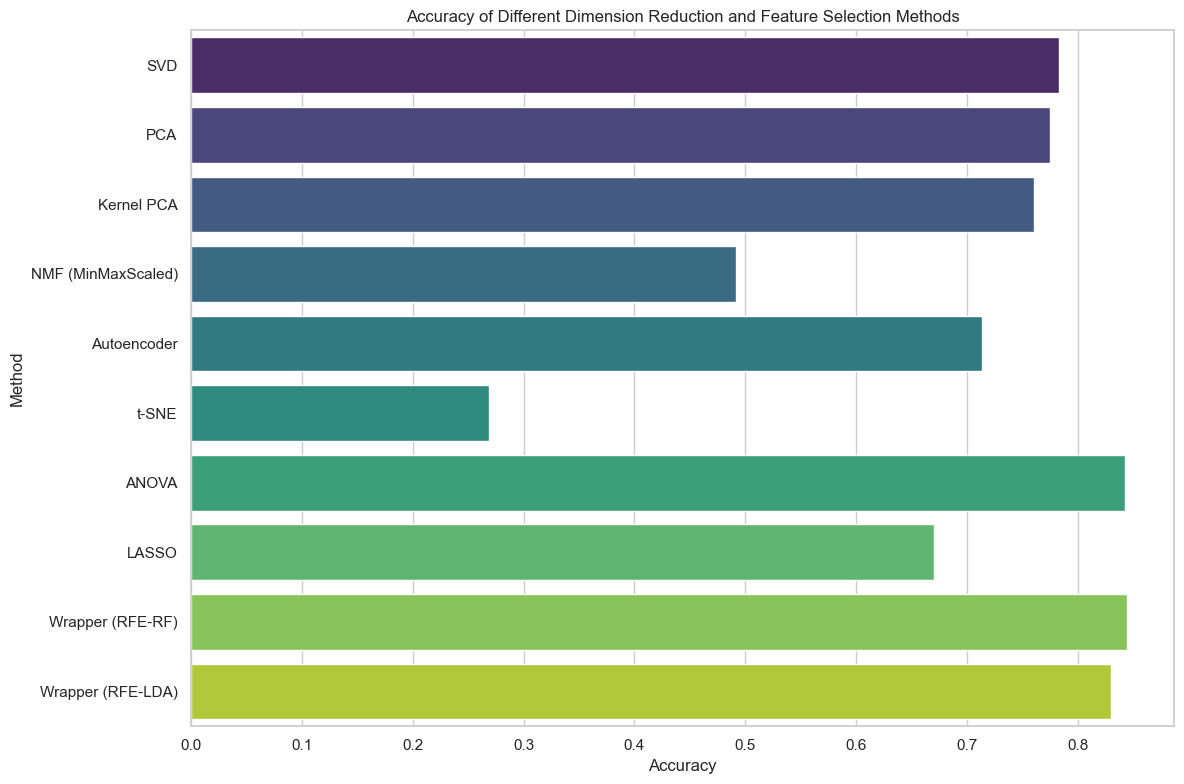

C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\3813281852.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1-Score', y='Method', data=performance_df, palette='magma')


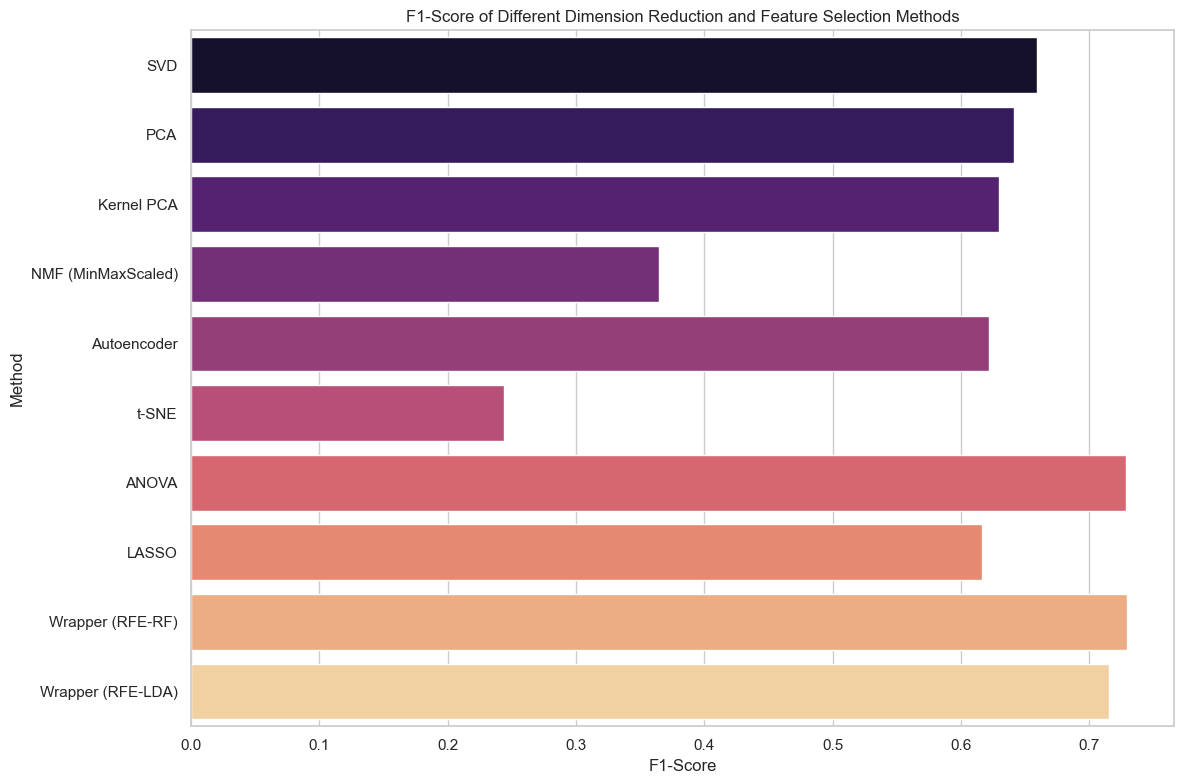

C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\3813281852.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Accuracy', y='Method', data=performance_df, palette='coolwarm')


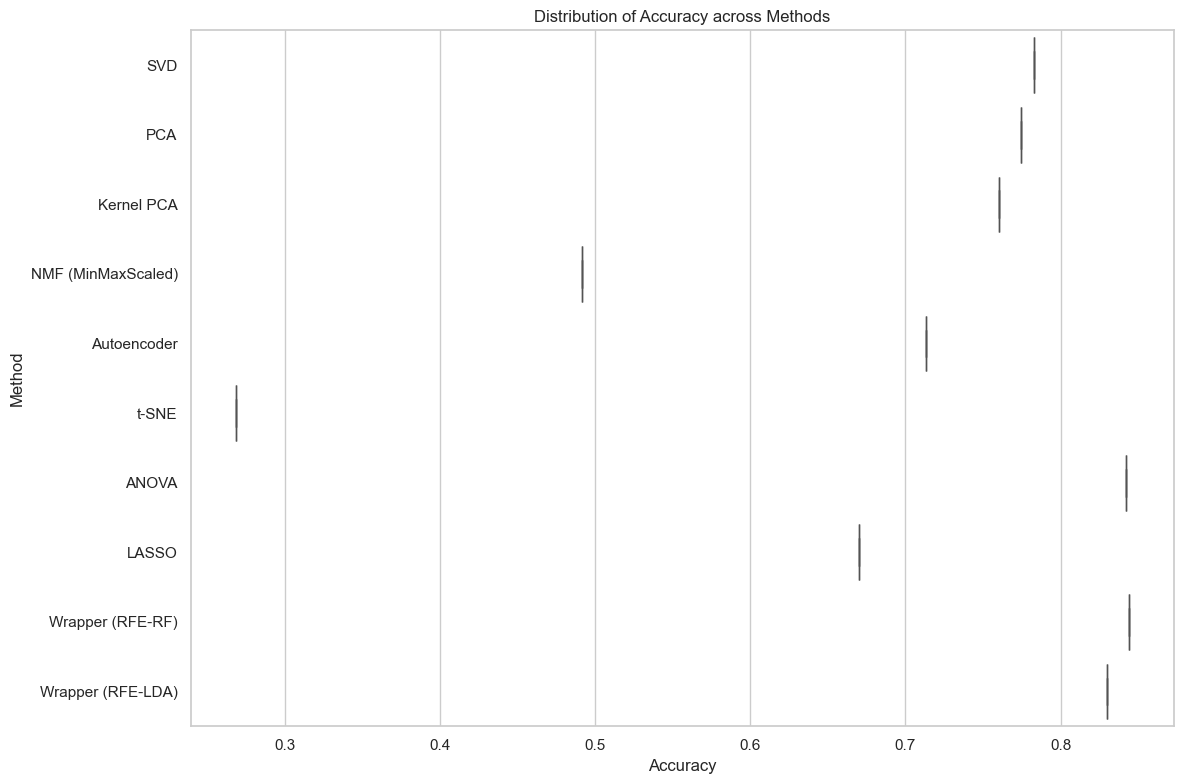

C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\3813281852.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='F1-Score', y='Method', data=performance_df, palette='cubehelix')


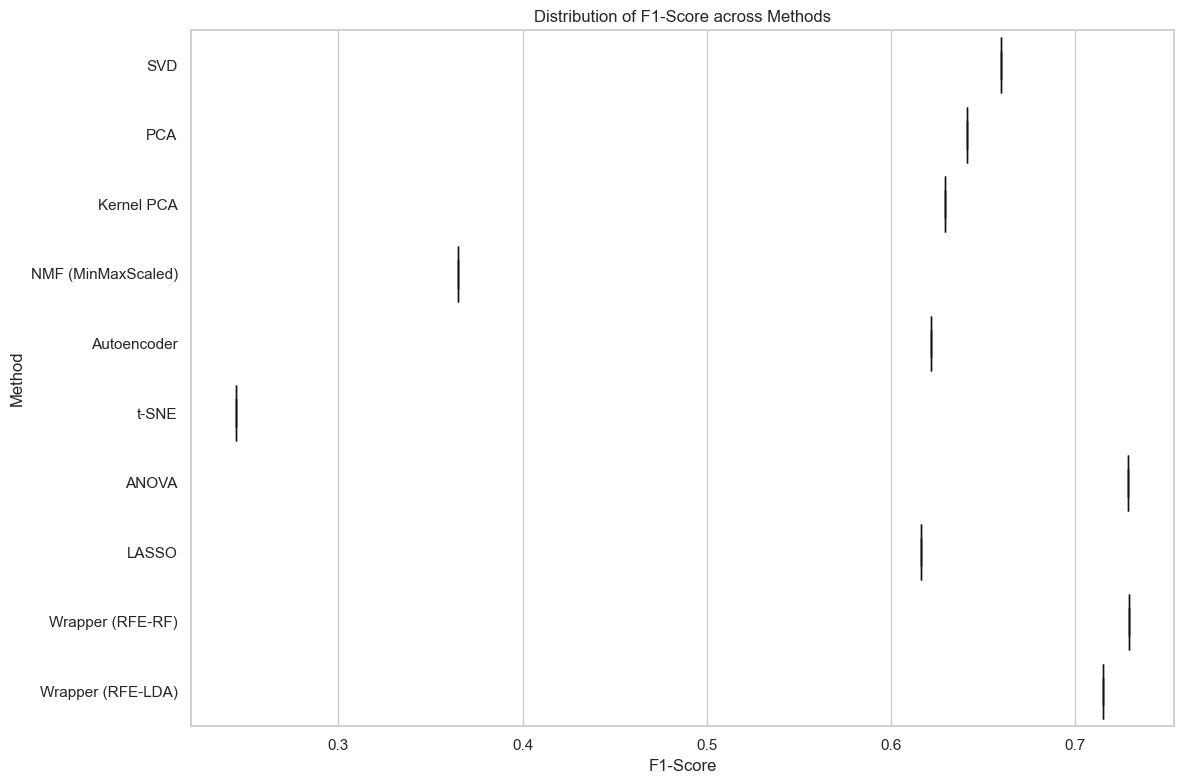

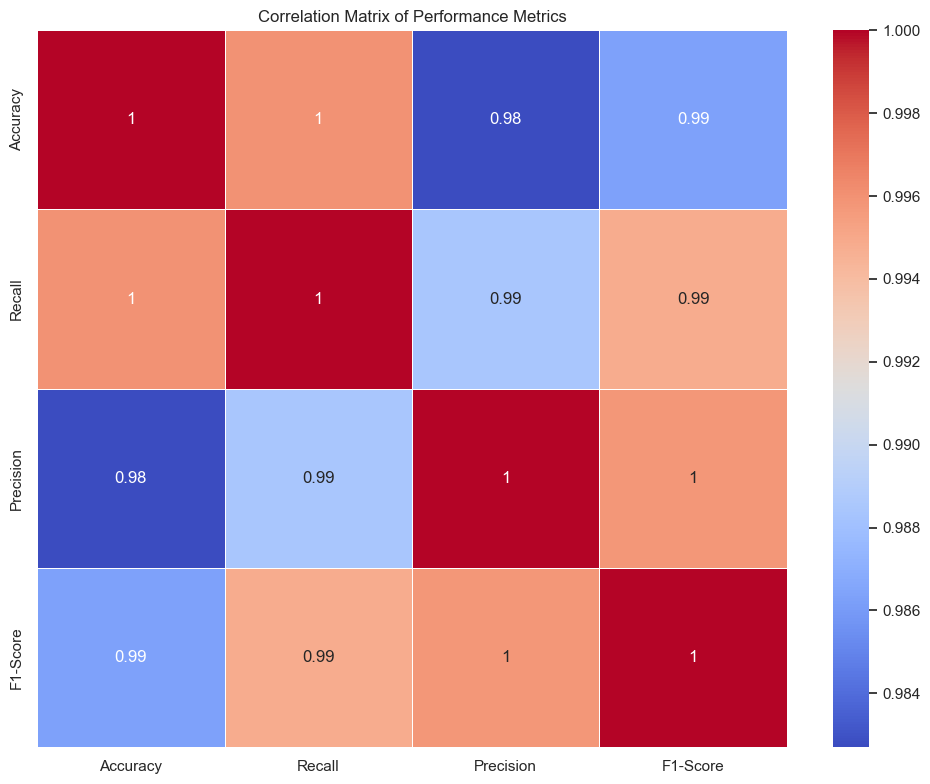

In [21]:
# Set the plotting style
sns.set(style="whitegrid")

# Plot Accuracy
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Method', data=performance_df, palette='viridis')
plt.title('Accuracy of Different Dimension Reduction and Feature Selection Methods')
plt.xlabel('Accuracy')
plt.ylabel('Method')
plt.tight_layout()
plt.savefig('Accuracy_Comparison.png')
plt.show()

# Plot F1-Score
plt.figure(figsize=(12, 8))
sns.barplot(x='F1-Score', y='Method', data=performance_df, palette='magma')
plt.title('F1-Score of Different Dimension Reduction and Feature Selection Methods')
plt.xlabel('F1-Score')
plt.ylabel('Method')
plt.tight_layout()
plt.savefig('F1_Score_Comparison.png')
plt.show()

# Boxplot for Accuracy
plt.figure(figsize=(12, 8))
sns.boxplot(x='Accuracy', y='Method', data=performance_df, palette='coolwarm')
plt.title('Distribution of Accuracy across Methods')
plt.xlabel('Accuracy')
plt.ylabel('Method')
plt.tight_layout()
plt.savefig('Accuracy_Distribution.png')
plt.show()

# Boxplot for F1-Score
plt.figure(figsize=(12, 8))
sns.boxplot(x='F1-Score', y='Method', data=performance_df, palette='cubehelix')
plt.title('Distribution of F1-Score across Methods')
plt.xlabel('F1-Score')
plt.ylabel('Method')
plt.tight_layout()
plt.savefig('F1_Score_Distribution.png')
plt.show()
# Calculate the correlation matrix
corr_matrix = performance_df.drop(columns=['Method']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Performance Metrics')
plt.tight_layout()
plt.savefig('Correlation_Matrix.png')
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import numpy as np
from sklearn.base import clone

# Load data
data = pd.read_csv('MyData.txt', delimiter='\s+', header=0)
labels_df = pd.read_csv('MyClass.txt', sep=' ', header=0)
labels = labels_df.iloc[:, -1]  # Extract the last column as labels

# Encode labels to ensure they are consistent and start from 0
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Function to simulate label contamination
def contaminate_labels(y, contamination_fraction):
    np.random.seed(42)
    y_contaminated = y.copy()
    n_samples = len(y)
    n_contaminated = int(n_samples * contamination_fraction)
    contaminated_indices = np.random.choice(n_samples, n_contaminated, replace=False)
    unique_labels = np.unique(y)
    for idx in contaminated_indices:
        possible_labels = list(unique_labels)
        possible_labels.remove(y[idx])
        y_contaminated[idx] = np.random.choice(possible_labels)
    return y_contaminated

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "MLP Classifier": MLPClassifier(max_iter=1000)
}

# Initialize feature selection methods
feature_selectors = {
    'ANOVA': SelectKBest(f_classif, k=50),
    'LASSO': SelectFromModel(Lasso(alpha=0.1, max_iter=10000)),
    'Wrapper LDA': SFS(LinearDiscriminantAnalysis(), n_features_to_select=3, direction='forward')
}

# Metrics to record
results = []

# Contamination levels to test
contamination_levels = [0, 0.05, 0.1, 0.2, 0.3]

for contamination in contamination_levels:
    y_contaminated = contaminate_labels(labels_encoded, contamination)
    
    X_train, X_test, y_train, y_test = train_test_split(data, y_contaminated, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Feature Selection
    for name, selector in feature_selectors.items():
        if name == 'LASSO':
            selector.fit(X_train_scaled, y_train)
            X_train_selected = selector.transform(X_train_scaled)
            X_test_selected = selector.transform(X_test_scaled)
        else:
            X_train_selected = selector.fit_transform(X_train_scaled, y_train)
            X_test_selected = selector.transform(X_test_scaled)
        
        # Evaluate classifiers
        for clf_name, clf in classifiers.items():
            clf_clone = clone(clf)  # Clone to ensure a fresh model each time
            clf_clone.fit(X_train_selected, y_train)
            y_pred = clf_clone.predict(X_test_selected)
            y_prob = clf_clone.predict_proba(X_test_selected)[:, 1] if hasattr(clf_clone, 'predict_proba') else None
            
            accuracy = accuracy_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred, average='macro')
            precision = precision_score(y_test, y_pred, average='macro')
            f1 = f1_score(y_test, y_pred, average='macro')
            
            results.append({
                'Contamination': contamination,
                'Feature Selection': name,
                'Classifier': clf_name,
                'Accuracy': accuracy,
                'Recall': recall,
                'Precision': precision,
                'F1-Score': f1,
                'Confidence': np.mean(y_prob) if y_prob is not None else np.nan
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save results to CSV
results_df.to_csv('Classification_Performance_Contamination.csv', index=False)

print("Results have been saved to 'Classification_Performance_Contamination.csv'.")

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DMPool\AppData\Local\Temp\ipykernel_43832\606226366.py:18: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('MyData.txt', delimiter='\s+', header=0)
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is il

Results have been saved to 'Classification_Performance_Contamination.csv'.


E:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


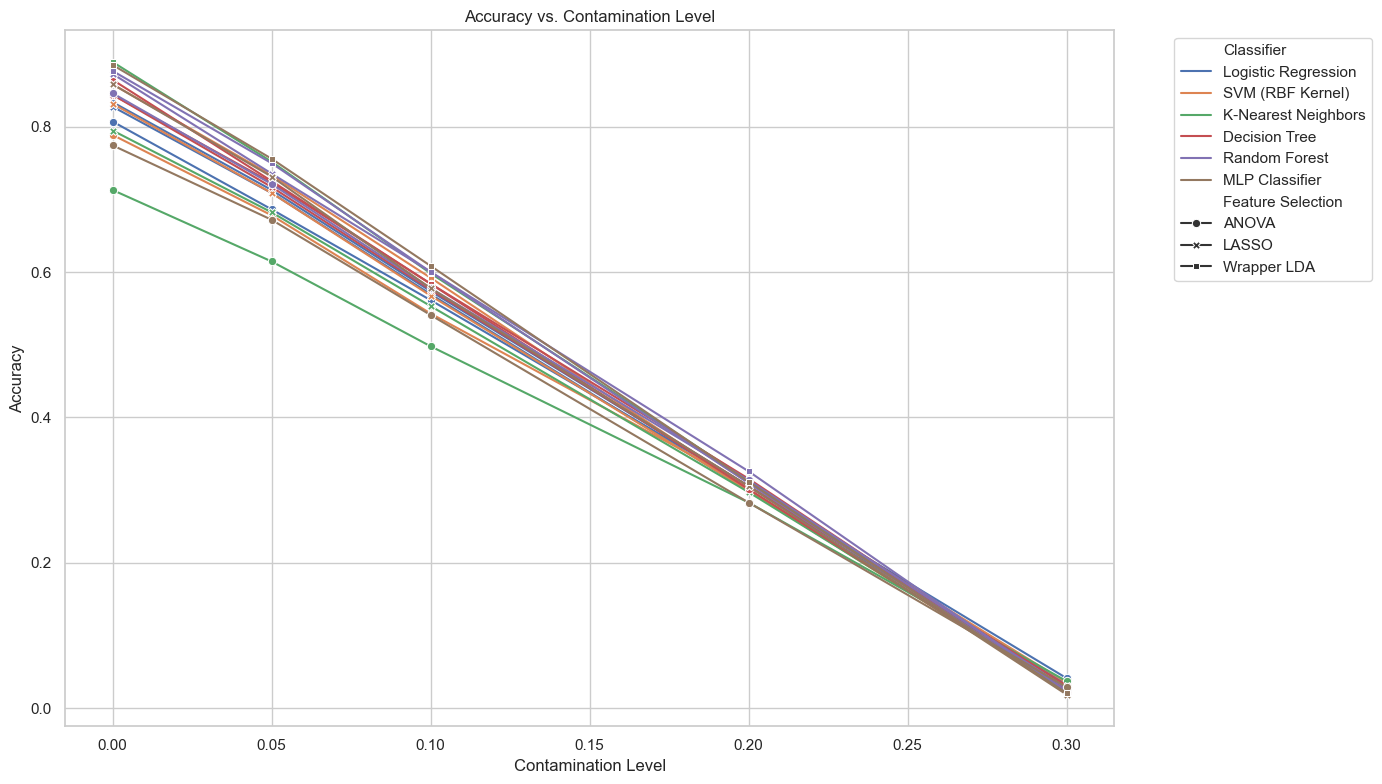

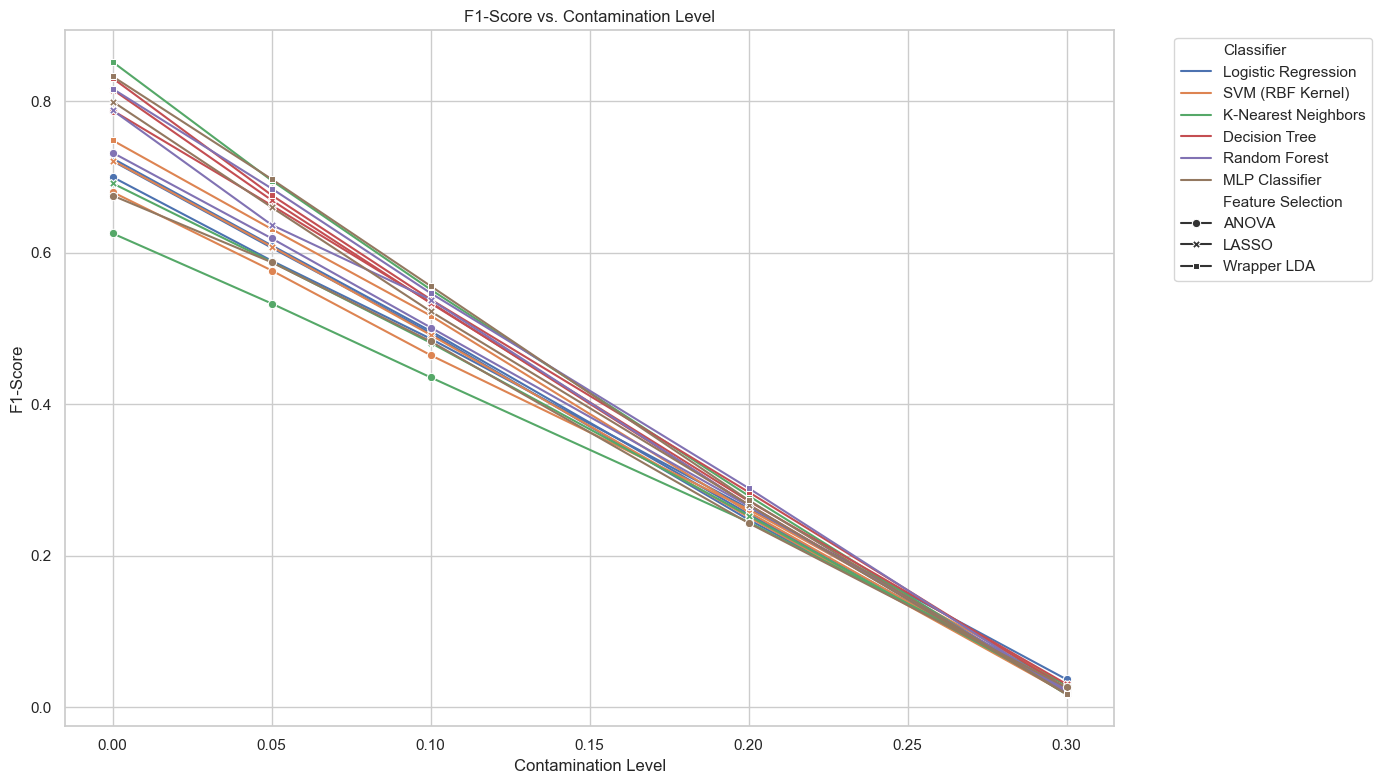

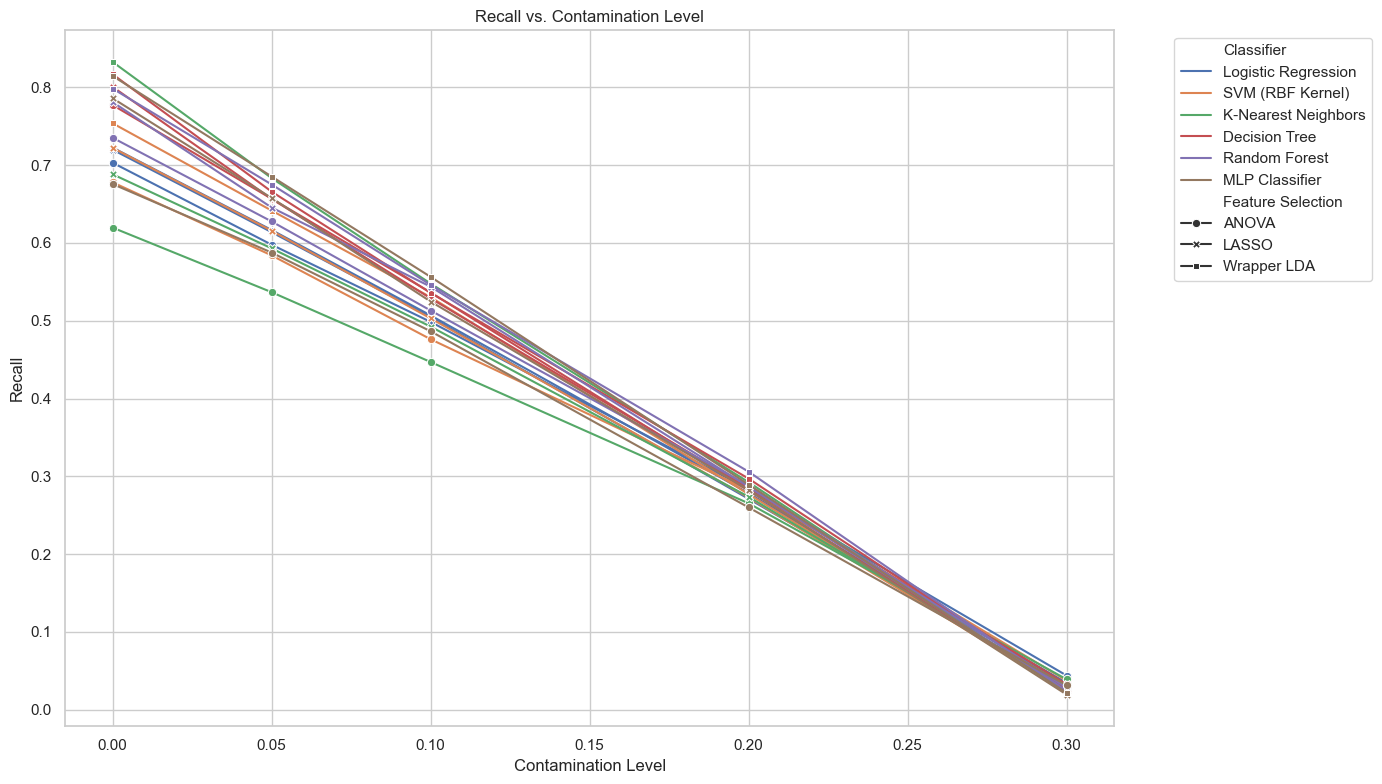

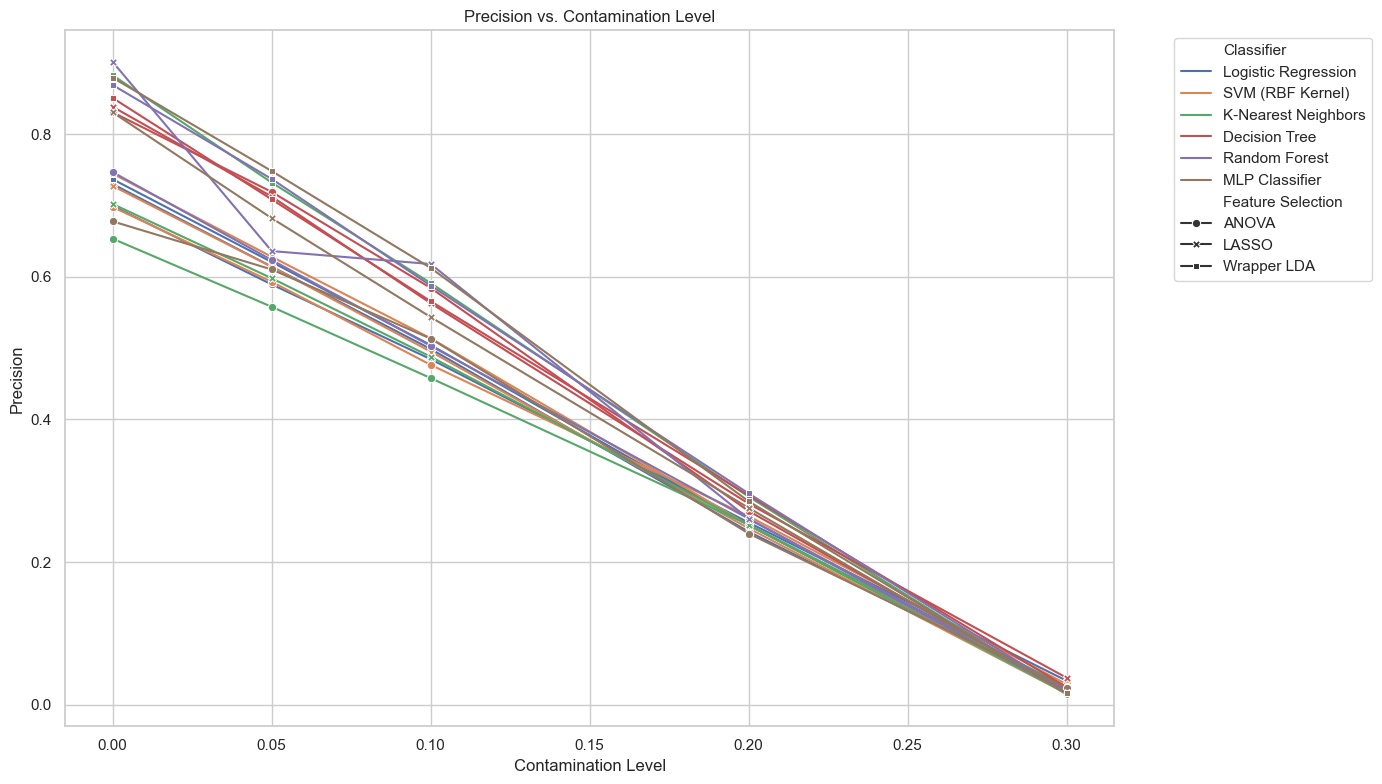

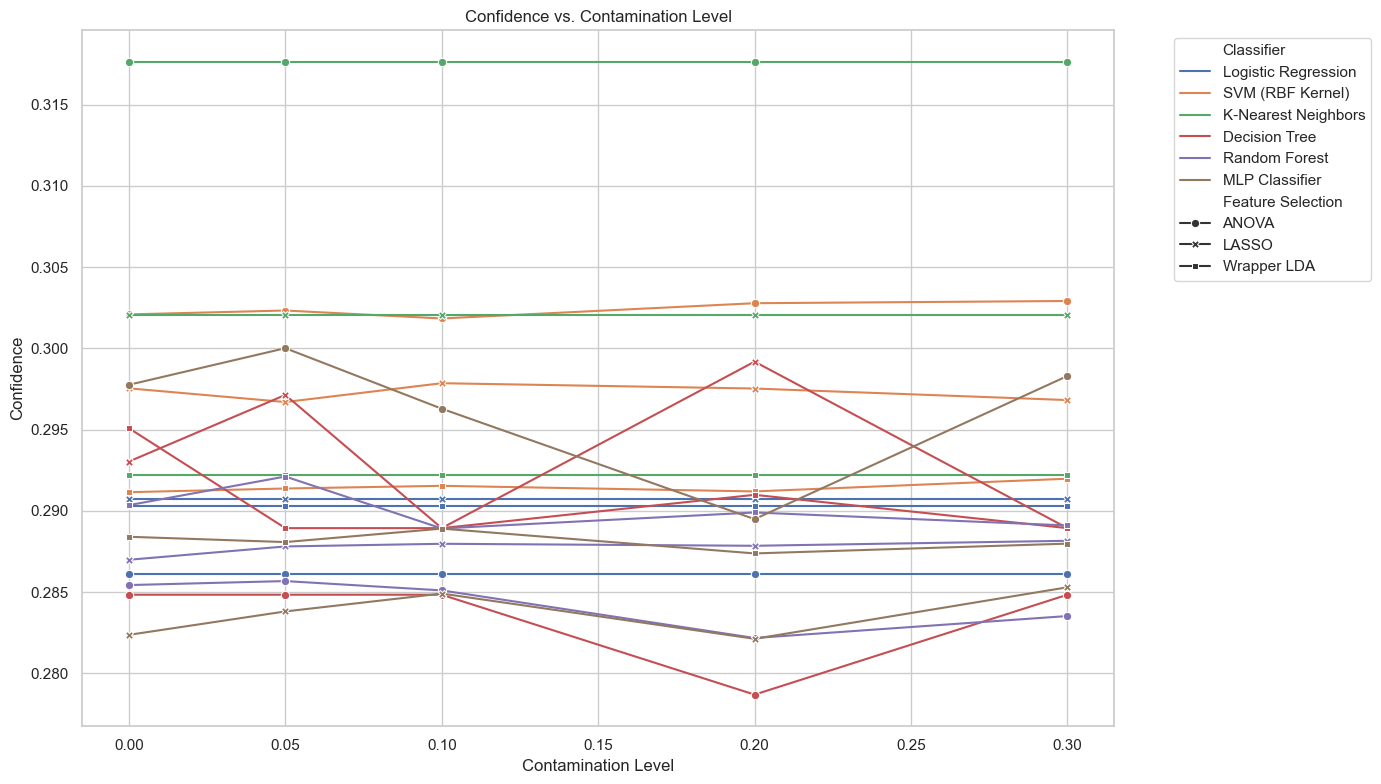

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the results
results_df = pd.read_csv('Classification_Performance_Contamination.csv')

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plot accuracy across contamination levels for each classifier and feature selection method
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Contamination', y='Accuracy', hue='Classifier', style='Feature Selection', markers=True, dashes=False)
plt.title('Accuracy vs. Contamination Level')
plt.ylabel('Accuracy')
plt.xlabel('Contamination Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot F1-Score across contamination levels for each classifier and feature selection method
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Contamination', y='F1-Score', hue='Classifier', style='Feature Selection', markers=True, dashes=False)
plt.title('F1-Score vs. Contamination Level')
plt.ylabel('F1-Score')
plt.xlabel('Contamination Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot Recall across contamination levels for each classifier and feature selection method
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Contamination', y='Recall', hue='Classifier', style='Feature Selection', markers=True, dashes=False)
plt.title('Recall vs. Contamination Level')
plt.ylabel('Recall')
plt.xlabel('Contamination Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot Precision across contamination levels for each classifier and feature selection method
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Contamination', y='Precision', hue='Classifier', style='Feature Selection', markers=True, dashes=False)
plt.title('Precision vs. Contamination Level')
plt.ylabel('Precision')
plt.xlabel('Contamination Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot Confidence across contamination levels for each classifier and feature selection method
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Contamination', y='Confidence', hue='Classifier', style='Feature Selection', markers=True, dashes=False)
plt.title('Confidence vs. Contamination Level')
plt.ylabel('Confidence')
plt.xlabel('Contamination Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: Undefine

Results have been saved to 'Classification_Performance_Contamination.csv' and 'Class_Level_Performance.csv'.


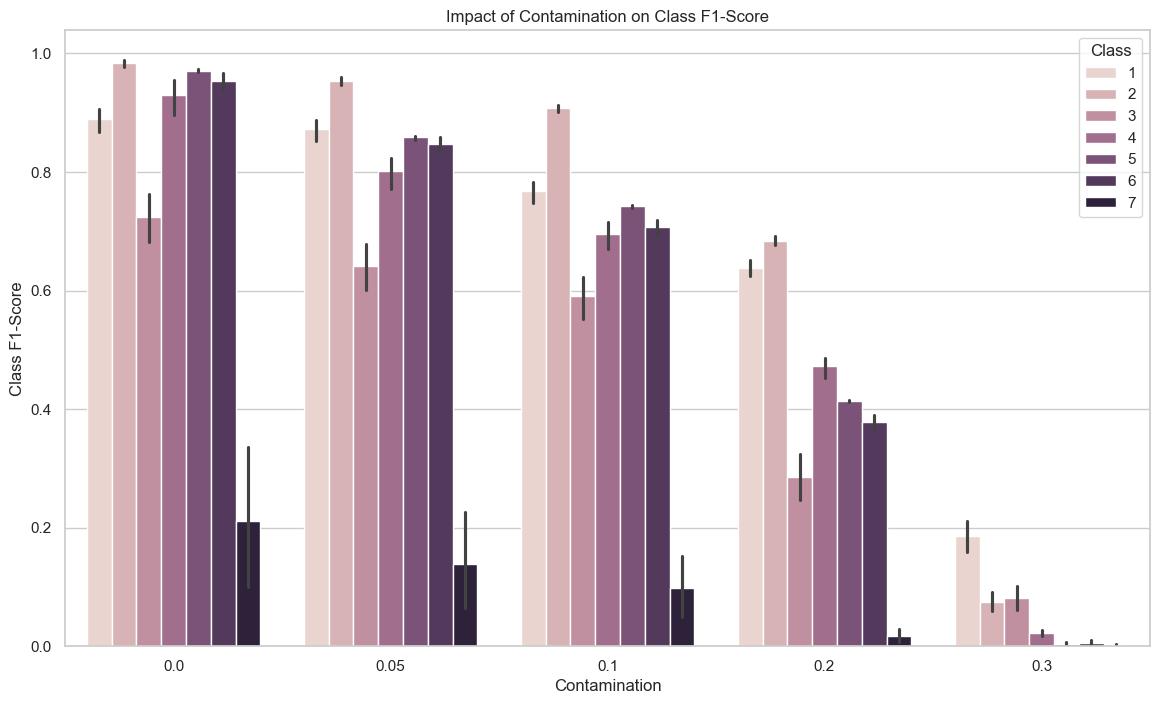

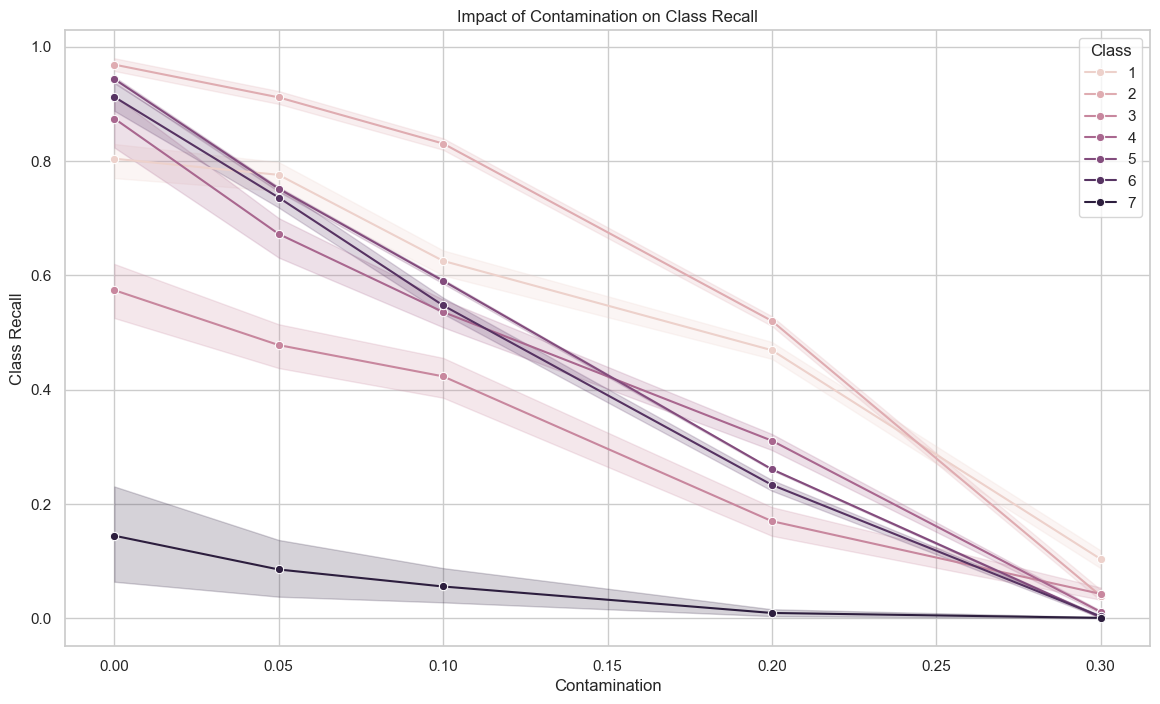

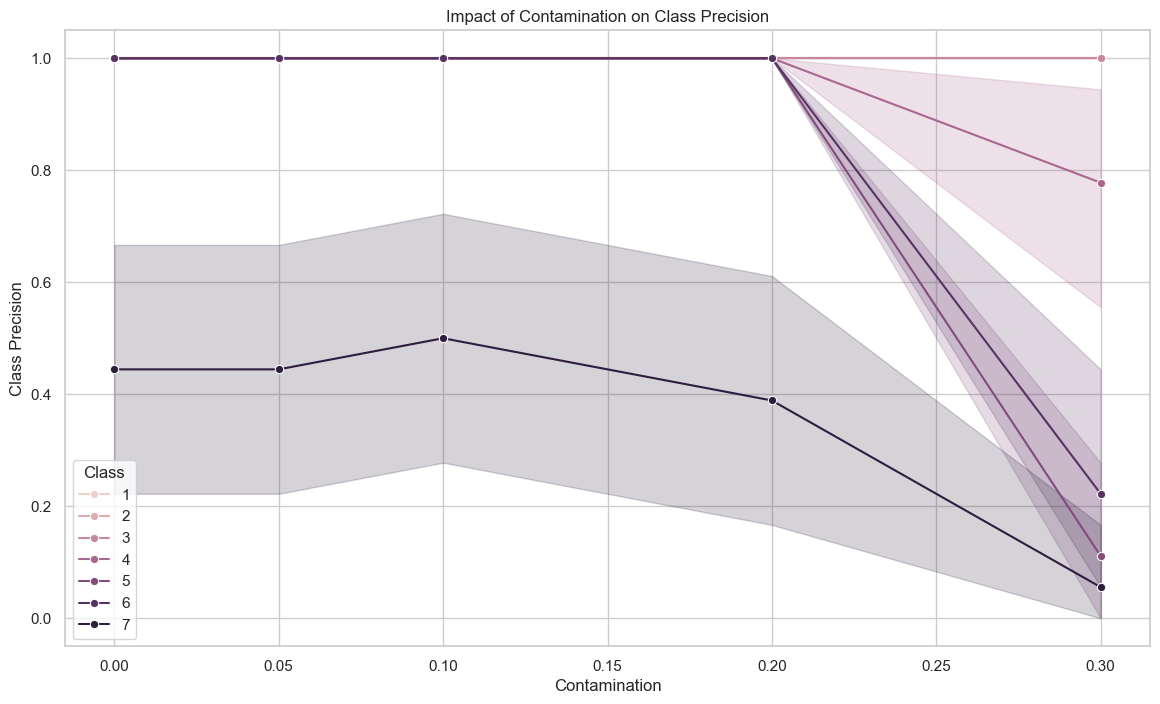

Summary Table:
     Contamination Feature Selection        Classifier  Class  Class Recall  \
0              0.0             ANOVA     Decision Tree      1      0.821053   
1              0.0             ANOVA     Decision Tree      2      0.911111   
2              0.0             ANOVA     Decision Tree      3      0.649123   
3              0.0             ANOVA     Decision Tree      4      0.898551   
4              0.0             ANOVA     Decision Tree      5      0.947368   
..             ...               ...               ...    ...           ...   
625            0.3       Wrapper LDA  SVM (RBF Kernel)      3      0.033333   
626            0.3       Wrapper LDA  SVM (RBF Kernel)      4      0.014286   
627            0.3       Wrapper LDA  SVM (RBF Kernel)      5      0.000000   
628            0.3       Wrapper LDA  SVM (RBF Kernel)      6      0.000000   
629            0.3       Wrapper LDA  SVM (RBF Kernel)      7      0.000000   

     Class Precision  Class F1-Score

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class-level metrics storage
class_level_results = []

# Initialize feature selectors and classifiers as in the previous code...

# Updated loop for class-level analysis
for contamination in contamination_levels:
    y_contaminated = contaminate_labels(labels_encoded, contamination)
    
    X_train, X_test, y_train, y_test = train_test_split(data, y_contaminated, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for name, selector in feature_selectors.items():
        if name == 'LASSO':
            selector.fit(X_train_scaled, y_train)
            X_train_selected = selector.transform(X_train_scaled)
            X_test_selected = selector.transform(X_test_scaled)
        else:
            X_train_selected = selector.fit_transform(X_train_scaled, y_train)
            X_test_selected = selector.transform(X_test_scaled)
        
        for clf_name, clf in classifiers.items():
            clf_clone = clone(clf)
            clf_clone.fit(X_train_selected, y_train)
            y_pred = clf_clone.predict(X_test_selected)
            y_prob = clf_clone.predict_proba(X_test_selected) if hasattr(clf_clone, 'predict_proba') else None
            
            accuracy = accuracy_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred, average= 'macro')
            precision = precision_score(y_test, y_pred, average = 'macro')
            f1 = f1_score(y_test, y_pred, average= 'macro')
            
            # Class-level metrics
            for class_label in np.unique(y_test):
                class_mask = (y_test == class_label)
                
                # Only calculate metrics for the current class
                class_recall = recall_score(y_test[class_mask], y_pred[class_mask], average=None, labels=[class_label], zero_division=0)
                class_precision = precision_score(y_test[class_mask], y_pred[class_mask], average=None, labels=[class_label], zero_division=0)
                class_f1 = f1_score(y_test[class_mask], y_pred[class_mask], average=None, labels=[class_label], zero_division=0)
                
                class_level_results.append({
                    'Contamination': contamination,
                    'Feature Selection': name,
                    'Classifier': clf_name,
                    'Class': label_encoder.inverse_transform([class_label])[0],
                    'Class Recall': class_recall[0],  # Extract the first (and only) element
                    'Class Precision': class_precision[0],  # Extract the first (and only) element
                    'Class F1-Score': class_f1[0],  # Extract the first (and only) element
                    'Confidence': np.mean(y_prob[class_mask, 1]) if y_prob is not None else np.nan
                })

# Convert results to DataFrames
results_df = pd.DataFrame(results)
class_level_df = pd.DataFrame(class_level_results)

# Save results to CSV
#results_df.to_csv('Classification_Performance_Contamination.csv', index=False)
class_level_df.to_csv('Class_Level_Performance.csv', index=False)

print("Results have been saved to 'Classification_Performance_Contamination.csv' and 'Class_Level_Performance.csv'.")

# Visualization: Impact of Contamination on Class-Level Performance
plt.figure(figsize=(14, 8))
sns.barplot(x='Contamination', y='Class F1-Score', hue='Class', data=class_level_df)
plt.title('Impact of Contamination on Class F1-Score')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Contamination', y='Class Recall', hue='Class', data=class_level_df, marker='o')
plt.title('Impact of Contamination on Class Recall')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Contamination', y='Class Precision', hue='Class', data=class_level_df, marker='o')
plt.title('Impact of Contamination on Class Precision')
plt.show()

# Summarize results in table form
summary_table = class_level_df.groupby(['Contamination', 'Feature Selection', 'Classifier', 'Class']).agg({
    'Class Recall': 'mean',
    'Class Precision': 'mean',
    'Class F1-Score': 'mean',
    'Confidence': 'mean'
}).reset_index()

print("Summary Table:")
print(summary_table)

# Save the summary table
summary_table.to_csv('Class_Level_Summary_Table.csv', index=False)
